In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
passmark = 70

In [6]:
df = pd.read_csv("E:\datasets\StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [8]:
print (df.shape)

(1000, 8)


In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
df.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

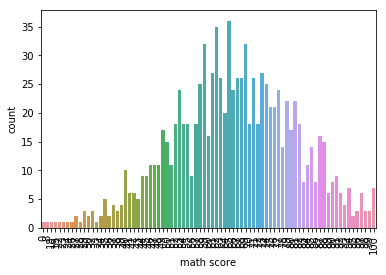

In [12]:
ax = sns.countplot(x ="math score", data = df)
ax = plt.setp(ax.get_xticklabels(), rotation=90) 
plt.show()

In [13]:
df['Math_PassStatus'] = np.where(df["math score"] >= passmark, "P", "F")
df.Math_PassStatus.value_counts()

F    591
P    409
Name: Math_PassStatus, dtype: int64

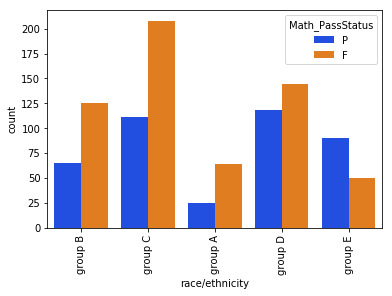

In [14]:
ax = sns.countplot(x ="race/ethnicity", data = df, hue='Math_PassStatus',palette="bright")
ax = plt.setp(ax.get_xticklabels(), rotation=90) 
plt.show()

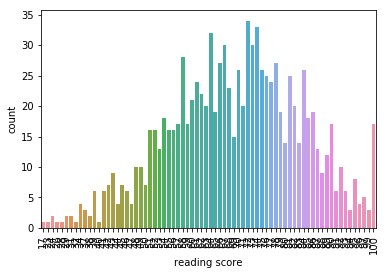

In [15]:
ax = sns.countplot(x ="reading score", data = df)
ax = plt.setp(ax.get_xticklabels(), rotation=90) 
plt.show()

In [16]:
df['Reading_PassStatus'] = np.where(df["reading score"] >= passmark, "P", "F")
df.Reading_PassStatus.value_counts()

P    513
F    487
Name: Reading_PassStatus, dtype: int64

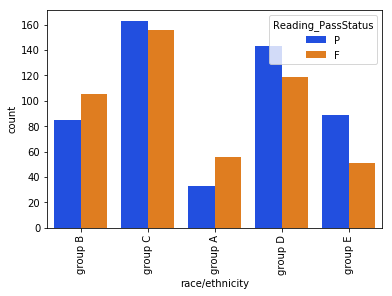

In [17]:
ax = sns.countplot(x ="race/ethnicity", data = df, hue='Reading_PassStatus',palette="bright")
ax = plt.setp(ax.get_xticklabels(), rotation=90) 
plt.show()

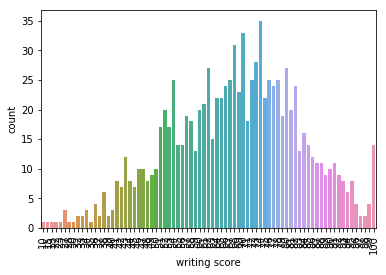

In [18]:
ax = sns.countplot(x ="writing score", data = df)
ax = plt.setp(ax.get_xticklabels(), rotation=90) 
plt.show()

In [19]:
df['Writing_PassStatus'] = np.where(df["writing score"] >= passmark, "P", "F")
df.Writing_PassStatus.value_counts()

F    511
P    489
Name: Writing_PassStatus, dtype: int64

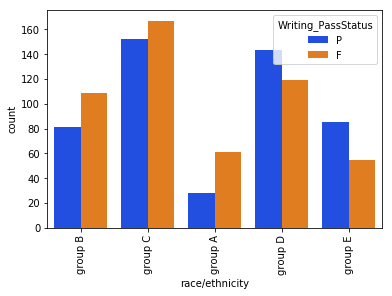

In [20]:
ax = sns.countplot(x ="race/ethnicity", data = df, hue='Writing_PassStatus',palette="bright")
ax = plt.setp(ax.get_xticklabels(), rotation=90) 
plt.show()

In [21]:
df['All_PassStatus'] = df.apply(lambda x : 'F' if x['Math_PassStatus'] == 'F' or x['Reading_PassStatus'] == 'F' 
                                                    or x['Writing_PassStatus'] == 'F' else 'P', axis = 1)

df.All_PassStatus.value_counts()

F    676
P    324
Name: All_PassStatus, dtype: int64

In [22]:
df["total_score"] = df["math score"] + df["reading score"]+ df["writing score"]
df["final_score"] = df["total_score"]/3

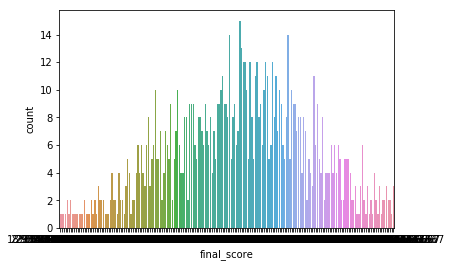

In [23]:
ax = sns.countplot(x ="final_score", data = df)
ax = plt.setp(ax.get_xticklabels(), rotation=0) 
plt.show()

In [26]:
def GradeDesc (final_score, All_PassStatus):
    if(All_PassStatus == 'F'):
        return 'D'
    if (final_score >= 90):
         return 'A'
    if (final_score >= 80):
         return 'B'
    if (final_score >= passmark):
         return 'C'
    else:
         return 'D'

In [27]:
df['Grade'] = df.apply(lambda x : GradeDesc(x['final_score'], x['All_PassStatus']), axis =1)
df.Grade.value_counts()

D    676
B    145
C    127
A     52
Name: Grade, dtype: int64

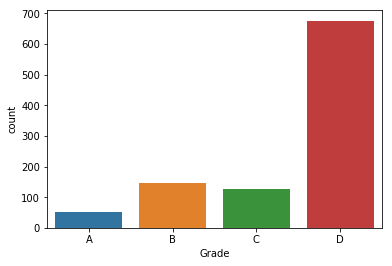

In [28]:
sns.countplot(x="Grade", data= df, order = ['A','B','C','D'])
plt.show()

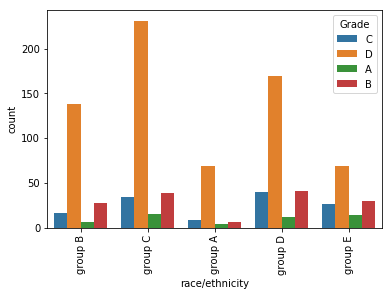

In [30]:
ax = sns.countplot(x = 'race/ethnicity', data = df, hue='Grade')
ax = plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()
